In [1]:
%pip install pyhrv==0.4.1
%pip install biosppy
%pip install matplotlib
%pip install numpy
%pip install scipy
%pip install nolds
%pip install spectrum
%pip install OpenSignalsReader
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


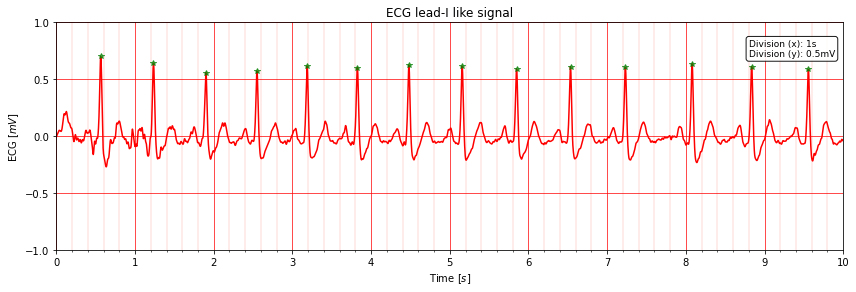

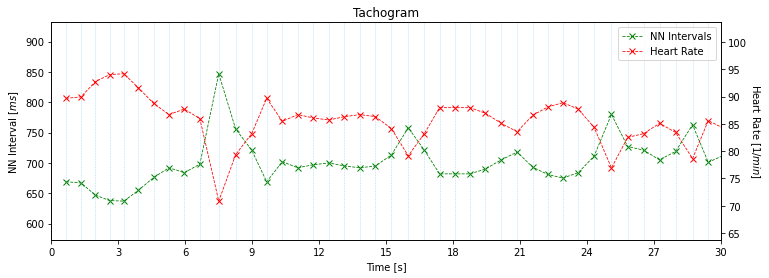

ReturnTuple(tachogram_plot=<Figure size 864x288 with 2 Axes>)

In [2]:
import pyhrv.tools as tools
import biosppy
import numpy as np
import pyhrv.tools as tools
from opensignalsreader import OpenSignalsReader

# Load sample ECG signal & extract R-peaks using BioSppy
import pandas as pd
signal_ecg = pd.read_csv('./ansei.csv', skiprows=None, header=None)
t, signal, rpeaks = biosppy.signals.ecg.ecg(signal=signal_ecg[1], sampling_rate=1000, show=False, interactive=False)[:3]
signal = (signal/1000)*1000 #ゲインで1000倍（1mv/V）しているため1000で割る（V)→ 1000倍して mVに

# Plot the ECG signal (interval: 0s to 10s)
tools.plot_ecg(signal, sampling_rate=1000, interval=[0, 10])

# Compute NNI(=RRI)
nni = tools.nn_intervals(rpeaks=t[rpeaks])

# Plot the Tachogram of the ECG signal (interval: 0s to 30s)
tools.tachogram(nni=nni, sampling_rate=1000, interval=[0, 30])

#print(nni)

In [3]:
# Import packages
import numpy as np
import pyhrv
import pyhrv.time_domain as td

# Load NNI sample series
nni = pyhrv.utils.load_sample_nni()

# Compute SDNN
result = td.sdnn(nni)

# Access SDNN value using the key 'sdnn'
print(result['sdnn'])

95.69035398754954


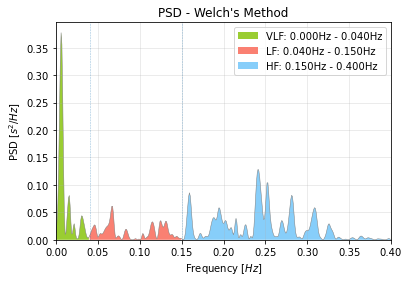

ReturnTuple(fft_bands=ReturnTuple(ulf=None, vlf=(0.0, 0.04), lf=(0.04, 0.15), hf=(0.15, 0.4)), fft_peak=(0.005859375, 0.0673828125, 0.2412109375), fft_abs=(2660.768201429601, 1561.5567256403754, 5337.081162110839), fft_rel=(27.834032539333343, 16.335290195566863, 55.830677265099794), fft_log=(7.88637015761169, 7.353438503722842, 8.582434183658979), fft_norm=(22.635725356928457, 77.36427464307154), fft_ratio=0.2925862804422433, fft_total=9559.406089180815, fft_plot=<Figure size 432x288 with 1 Axes>, fft_nfft=4096, fft_window='hamming', fft_resampling_frequency=4, fft_interpolation='cubic')


In [4]:
# Import packages
import numpy as np
import pyhrv
import pyhrv.frequency_domain as fd

# Load NNI sample series
nni = pyhrv.utils.load_sample_nni()

# Compute the PSD and frequency domain parameters 
result = fd.welch_psd(nni=nni, show_param=False) # param=Trueとすると、解析結果表示

# Access peak frequencies using the key 'fft_peak'
#print(result['fft_peak'])
print(result)